In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("climate_data.csv")

In [4]:
data.columns = [
    'date','min_temp', 'max_temp', 'avg_temp', 'avg_humidity', 'rainfall', 
    'sunshine_duration', 'max_wind_speed', 'wind_direction_max_speed', 
    'avg_wind_speed', 'most_wind_direction', 'station_id'
]

In [5]:
data

,date,min_temp,max_temp,avg_temp,avg_humidity,rainfall,sunshine_duration,max_wind_speed,wind_direction_max_speed,avg_wind_speed,most_wind_direction,station_id
0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001
1,02-01-2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001
2,03-01-2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001
3,04-01-2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001
4,05-01-2010,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001
...,...,...,...,...,...,...,...,...,...,...,...,...
589260,27-12-2020,25.2,31.2,29.2,74.0,0.0,1.4,4.0,280.0,2.0,C,97980
589261,28-12-2020,25.3,31.6,28.1,78.0,NaN,3.0,12.0,260.0,2.0,C,97980
589262,29-12-2020,24.6,32.3,28.4,81.0,NaN,6.5,5.0,260.0,2.0,SW,97980
589263,30-12-2020,25.2,32.6,28.4,80.0,0.0,2.4,7.0,260.0,2.0,C,97980


In [6]:
data = data.drop(columns=['date', 'station_id'])

In [7]:
data

,min_temp,max_temp,avg_temp,avg_humidity,rainfall,sunshine_duration,max_wind_speed,wind_direction_max_speed,avg_wind_speed,most_wind_direction
0,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E
1,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E
2,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E
3,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW
4,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
589260,25.2,31.2,29.2,74.0,0.0,1.4,4.0,280.0,2.0,C
589261,25.3,31.6,28.1,78.0,NaN,3.0,12.0,260.0,2.0,C
589262,24.6,32.3,28.4,81.0,NaN,6.5,5.0,260.0,2.0,SW
589263,25.2,32.6,28.4,80.0,0.0,2.4,7.0,260.0,2.0,C


In [8]:
data2 = data.drop(columns=['max_wind_speed', 'wind_direction_max_speed', 'avg_wind_speed', 'most_wind_direction'])

In [9]:
data2 = data2.dropna()

In [10]:
data2

,min_temp,max_temp,avg_temp,avg_humidity,rainfall,sunshine_duration
0,21.4,30.2,27.1,82.0,9.0,0.5
1,21.0,29.6,25.7,95.0,24.0,0.2
2,20.2,26.8,24.5,98.0,63.0,0.0
3,21.0,29.2,25.8,90.0,0.0,0.1
4,21.2,30.0,26.7,90.0,2.0,0.4
...,...,...,...,...,...,...
589258,24.4,31.7,28.2,84.0,8.5,6.0
589259,24.0,31.8,27.6,81.0,1.5,8.1
589260,25.2,31.2,29.2,74.0,0.0,1.4
589263,25.2,32.6,28.4,80.0,0.0,2.4


In [17]:
import random
def generate_serangan_hama(row):
    # Tentukan target dengan aturan sederhana
    if row['max_temp'] > 30 and row['avg_humidity'] > 80:  # Suhu tinggi dan kelembapan tinggi
        target = 1  # Serangan hama
    elif row['rainfall'] > 20 and row['sunshine_duration'] < 4:  # Curah hujan tinggi dan durasi sinar matahari rendah
        target = 1  # Serangan hama
    elif row['avg_temp'] > 28 and row['avg_humidity'] > 85:  # Suhu tinggi dan kelembapan tinggi
        target = 1  # Serangan hama
    else:
        target = 0  # Tidak ada serangan hama

    # Menambahkan kebisingan (noise) untuk memperkenalkan ketidakpastian
    if random.random() < 0.1:  # 10% probabilitas untuk membalikkan target
        target = 1 - target 
    return target
# Terapkan fungsi untuk menetapkan target 'serangan_hama'
data2['serangan_hama'] = data.apply(generate_serangan_hama, axis=1)


In [18]:
data2

,min_temp,max_temp,avg_temp,avg_humidity,rainfall,sunshine_duration,serangan_hama
0,21.4,30.2,27.1,82.0,9.0,0.5,1
1,21.0,29.6,25.7,95.0,24.0,0.2,1
2,20.2,26.8,24.5,98.0,63.0,0.0,1
3,21.0,29.2,25.8,90.0,0.0,0.1,0
4,21.2,30.0,26.7,90.0,2.0,0.4,0
...,...,...,...,...,...,...,...
589258,24.4,31.7,28.2,84.0,8.5,6.0,0
589259,24.0,31.8,27.6,81.0,1.5,8.1,1
589260,25.2,31.2,29.2,74.0,0.0,1.4,0
589263,25.2,32.6,28.4,80.0,0.0,2.4,0


In [19]:
data2.to_csv("data2.csv", index=False)

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Pisahkan fitur dan target
X = data2[['min_temp', 'max_temp', 'avg_temp', 'avg_humidity', 'rainfall', 'sunshine_duration']]
y = data2['serangan_hama']

# Bagi data menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model Decision Tree dengan pruning
model_dt = DecisionTreeClassifier(random_state=42, 
                                  max_depth=10,           # Batasi kedalaman pohon
                                  min_samples_split=10,   # Minimal 10 sampel untuk membagi node
                                  min_samples_leaf=5)     # Minimal 5 sampel untuk menjadi daun

model_dt.fit(X_train, y_train)
# Prediksi dengan data test
y_pred_dt = model_dt.predict(X_test)

# Evaluasi model
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(classification_report(y_test, y_pred_dt))


Accuracy: 0.8989421298105735
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     35967
           1       0.90      0.91      0.91     40791

    accuracy                           0.90     76758
   macro avg       0.90      0.90      0.90     76758
weighted avg       0.90      0.90      0.90     76758



In [35]:
# Fungsi untuk memprediksi serangan hama
def prediksi_serangan_hama(sensor_data):
    # Menyiapkan data fitur berdasarkan input sensor
    fitur = [sensor_data['min_temp'], sensor_data['max_temp'], sensor_data['avg_temp'], 
             sensor_data['avg_humidity'], sensor_data['rainfall'], sensor_data['sunshine_duration']]
    
    # Reshape fitur menjadi bentuk yang diterima oleh model (array 2D)
    fitur = [fitur]
    
    # Melakukan prediksi dengan model yang sudah dilatih
    prediksi = model_dt.predict(fitur)
    
    # Mengembalikan hasil prediksi
    if prediksi == 1:
        return "Prediksi: Ada serangan hama"
    else:
        return "Prediksi: Tidak ada serangan hama"

# Simulasi input data sensor (misalnya dari IoT)
sensor_input = {
    'min_temp': 23,
    'max_temp': 38,
    'avg_temp': 28,
    'avg_humidity': 52,
    'rainfall': 18,
    'sunshine_duration': 3
}

# Menjalankan fungsi prediksi dengan data sensor
hasil_prediksi = prediksi_serangan_hama(sensor_input)
print(hasil_prediksi)

Prediksi: Tidak ada serangan hama


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


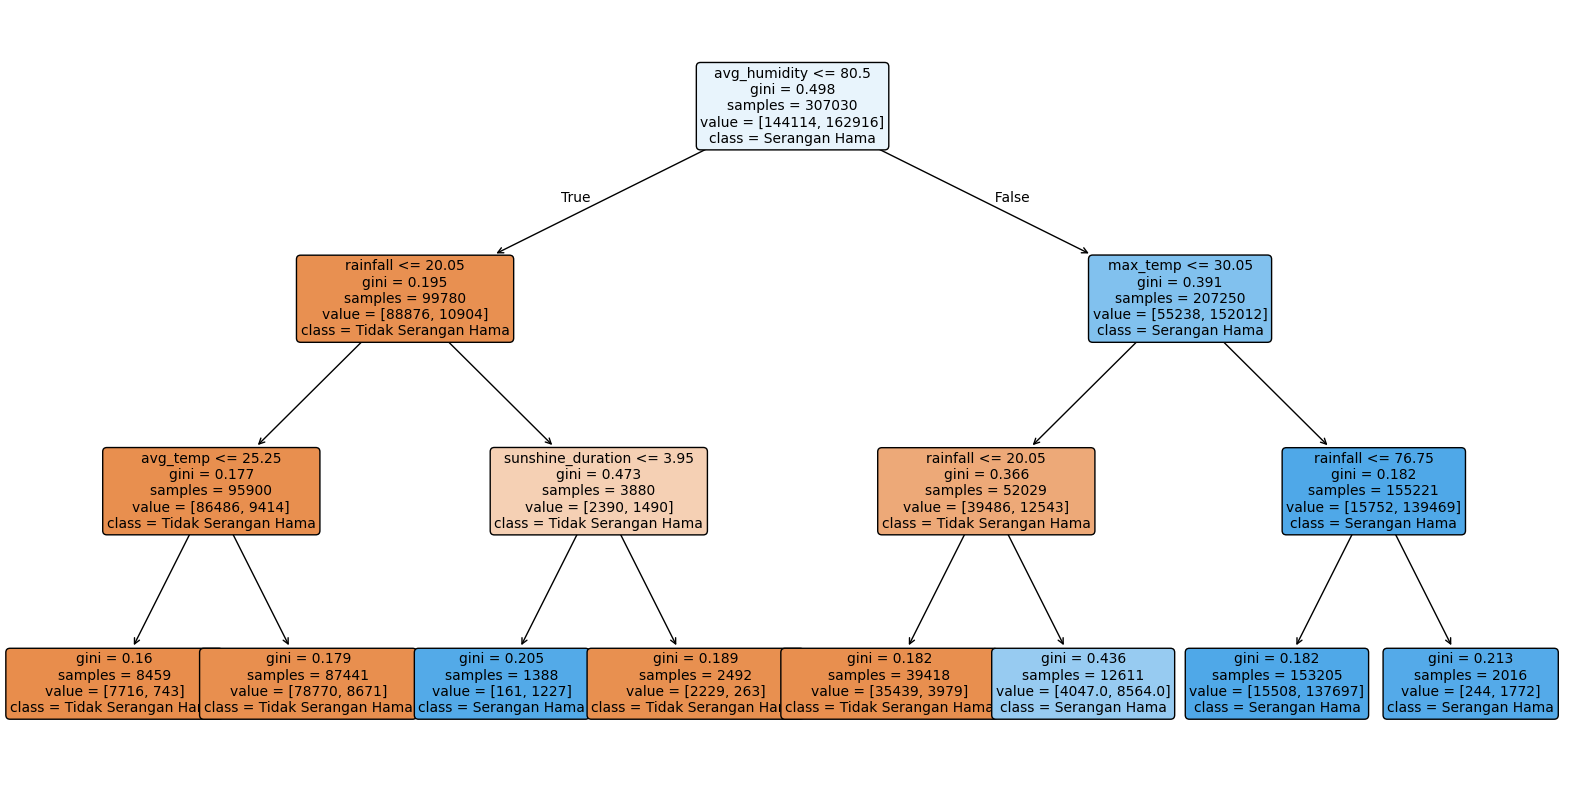

In [43]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Membuat model Decision Tree dengan batasan kedalaman pohon
model_dt_simplified = DecisionTreeClassifier(random_state=42, 
                                             max_depth=3,  # Batasi kedalaman menjadi 3
                                             min_samples_split=10,  
                                             min_samples_leaf=5)
# Fit model dengan data
model_dt_simplified.fit(X_train, y_train)
# Visualisasikan pohon keputusan
plt.figure(figsize=(20,10))
plot_tree(model_dt_simplified, 
          filled=True, 
          feature_names=X.columns, 
          class_names=['Tidak Serangan Hama', 'Serangan Hama'], 
          rounded=True, 
          fontsize=10)
plt.show()


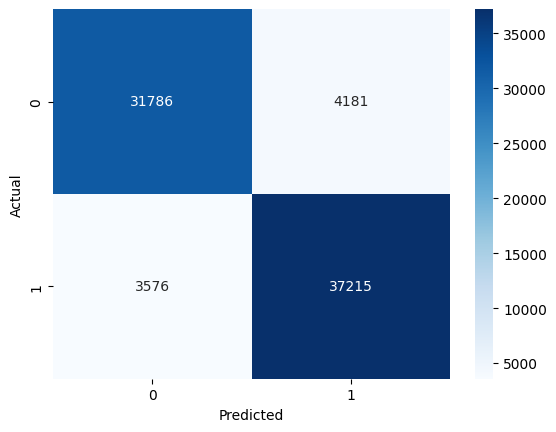

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [37]:
from sklearn.model_selection import cross_val_score

# Cross-validation untuk mengevaluasi model
model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)

# Cross-validation dengan 5 fold
scores = cross_val_score(model, X, y, cv=5)

print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean()}")


Cross-validation scores: [0.89297533 0.89749603 0.92340863 0.88621233 0.89864117]
Mean accuracy: 0.8997466970309251


In [1]:
from nbconvert import ScriptExporter
import nbformat

# Buka file .ipynb
with open("P3_Kelompok 1_notebook_kecerdasan_buatan.ipynb", 'r', encoding='utf-8') as f:
    notebook = nbformat.read(f, as_version=4)

# Konversi ke .py
exporter = ScriptExporter()
(body, resources) = exporter.from_notebook_node(notebook)

# Simpan sebagai .py
with open("nama_file.py", 'w', encoding='utf-8') as f:
    f.write(body)
